First 5 rows of the dataset:
   patient_id  age  gender  pack_years radon_exposure asbestos_exposure  \
0      100000   69    Male   66.025244           High                No   
1      100001   32  Female   12.780800           High                No   
2      100002   89  Female    0.408278         Medium               Yes   
3      100003   78  Female   44.065232            Low                No   
4      100004   38  Female   44.432440         Medium               Yes   

  secondhand_smoke_exposure copd_diagnosis alcohol_consumption family_history  \
0                        No            Yes            Moderate             No   
1                       Yes            Yes            Moderate            Yes   
2                       Yes            Yes                 NaN             No   
3                       Yes             No            Moderate             No   
4                        No            Yes                 NaN            Yes   

  lung_cancer  
0          No  
1

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11572\510856866.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode(dropna=True)[0], inplace=True)


          patient_id           age    pack_years
count   50000.000000  50000.000000  50000.000000
mean   124999.500000     58.857040     49.963424
std     14433.901067     23.958266     28.852082
min    100000.000000     18.000000      0.002753
25%    112499.750000     38.000000     24.774558
50%    124999.500000     59.000000     50.177634
75%    137499.250000     80.000000     75.066740
max    149999.000000    100.000000     99.999204

Average patient_id by gender:
gender
Female    125111.337811
Male      124886.899097
Name: patient_id, dtype: float64


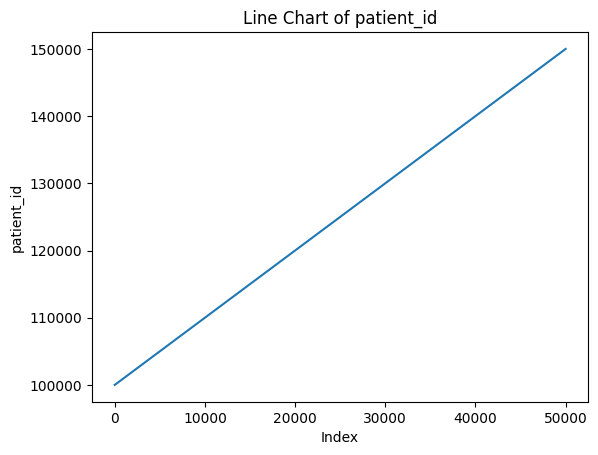

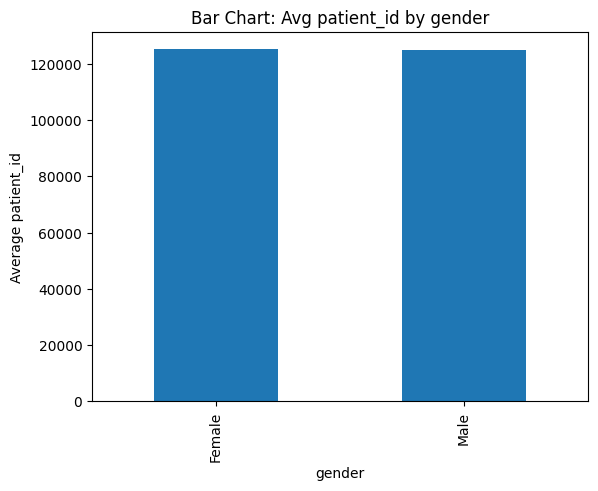

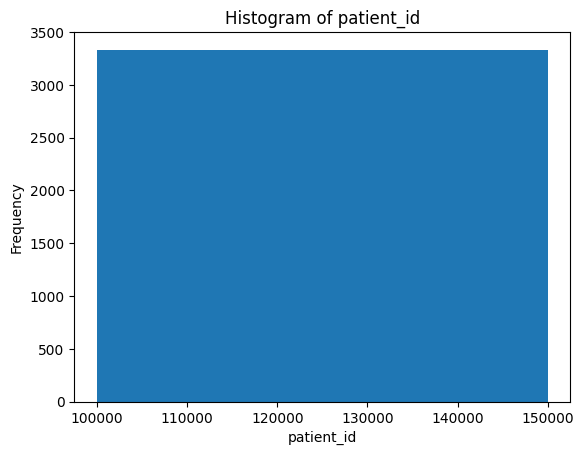

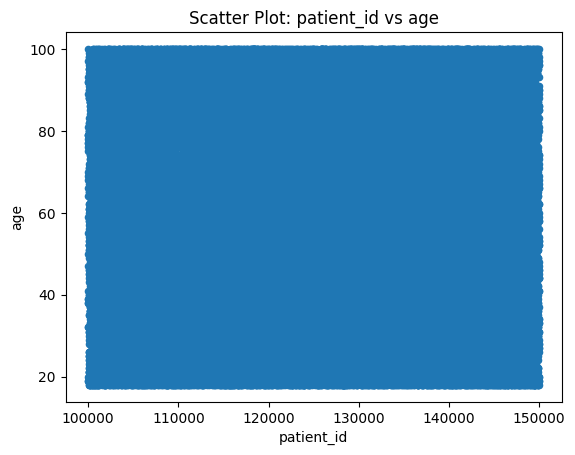


Findings & Observations:
- Dataset shape: 50000 rows × 11 columns.
- Missing values handled using median (numeric) and mode (categorical).
- Grouping by 'gender', the highest average patient_id is in: Female.
- Correlation between patient_id and age: -0.004


In [2]:
# Data Analysis Assignment — Using Attached Dataset

# ------------------------------
# Task 1: Load and Explore
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
csv_path = "lung_cancer_dataset.csv" 
df = pd.read_csv(csv_path)

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

# Clean missing values
df_clean = df.copy()
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

for col in num_cols:
    if df_clean[col].isnull().any():
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

for col in cat_cols:
    if df_clean[col].isnull().any():
        if df_clean[col].dropna().shape[0] > 0:
            df_clean[col].fillna(df_clean[col].mode(dropna=True)[0], inplace=True)
        else:
            df_clean.drop(columns=[col], inplace=True)

print("\n✅ Missing values handled.")

# ------------------------------
# Task 2: Basic Data Analysis
# ------------------------------
print("\nBasic statistics of numeric columns:")
print(df_clean.describe())

# Grouping
group_col = None
if len(cat_cols) > 0:
    group_col = cat_cols[0]

if group_col:
    print(f"\nAverage {num_cols[0]} by {group_col}:")
    print(df_clean.groupby(group_col)[num_cols[0]].mean())

# ------------------------------
# Task 3: Data Visualizations
# ------------------------------

# Line chart (first numeric column over index)
if len(num_cols) > 0:
    df_clean[num_cols[0]].plot(title=f"Line Chart of {num_cols[0]}")
    plt.xlabel("Index")
    plt.ylabel(num_cols[0])
    plt.show()

# Bar chart (grouped averages)
if group_col:
    df_clean.groupby(group_col)[num_cols[0]].mean().plot(kind='bar', title=f"Bar Chart: Avg {num_cols[0]} by {group_col}")
    plt.ylabel(f"Average {num_cols[0]}")
    plt.show()

# Histogram
if len(num_cols) > 0:
    df_clean[num_cols[0]].plot(kind='hist', bins=15, title=f"Histogram of {num_cols[0]}")
    plt.xlabel(num_cols[0])
    plt.show()

# Scatter plot (first two numeric columns)
if len(num_cols) >= 2:
    df_clean.plot.scatter(x=num_cols[0], y=num_cols[1], title=f"Scatter Plot: {num_cols[0]} vs {num_cols[1]}")
    plt.show()

# ------------------------------
# Findings
# ------------------------------
print("\nFindings & Observations:")
print(f"- Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns.")
print("- Missing values handled using median (numeric) and mode (categorical).")

if group_col:
    top_group = df_clean.groupby(group_col)[num_cols[0]].mean().idxmax()
    print(f"- Grouping by '{group_col}', the highest average {num_cols[0]} is in: {top_group}.")
if len(num_cols) >= 2:
    corr_val = df_clean[[num_cols[0], num_cols[1]]].corr().iloc[0, 1]
    print(f"- Correlation between {num_cols[0]} and {num_cols[1]}: {corr_val:.3f}")
